# Table of Contents
## 1.[Preprocess data](#preprocessing)

## 2.[Prelu model](#Prelu)

## 3.[ELu model](#ELu)

## 4.[Customize Loss Function in PyTorch](#Customize)
## 5.[Model in Keras](#Keras)

## Preprocessing

In [7]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import matplotlib.pyplot as plt
import time
import torch.utils.data as Data

data = pd.read_csv('good_data_starts_valley.csv')
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
data_normalized = sc.fit_transform(data.T).T
from sklearn.model_selection import train_test_split
random_state = 11
training_set, test_set = train_test_split(data_normalized, test_size = 0.2, random_state = random_state)
nb_diff = data.shape[1]
nb_train = training_set.shape[0]
nb_test = test_set.shape[0]

training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)
torch_dataset = Data.TensorDataset(training_set,training_set)

training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

BATCH_SIZE = 256
loader = Data.DataLoader(
    dataset = torch_dataset,      # torch TensorDataset format
    batch_size = BATCH_SIZE,      # mini batch size
    shuffle = True,               # random shuffle for training            # subprocesses for loading data
)

## Prelu
batch_size = 256

epoch = 10000

learning rate = 0.001

alpha = 0.6

network structure: 1500-200-100-50-100-200-1500

activation function: Prelu

loss function: mse

optimizer: Adam

In [25]:
cd /home/jimmy/Desktop/autoencoder/08032018prelu_alpha

/home/jimmy/Desktop/autoencoder/08032018prelu_alpha


In [26]:
ls

autoencoder_elu_alpha_0.1         autoencoder_pytorch_PReLu_1.py
autoencoder_elu_alpha_0.4         autoencoder_pytorch_PReLu.py
autoencoder_elu_alpha_0.6         autoencoder_pytorch_Tanhshrink_0.25.py
autoencoder_elu_alpha_0.8         autoencoder_pytorch_Tanhshrink.py
autoencoder_elu_alpha_1           detect_peaks.py
autoencoder_Prelu_alpha_0.6       good_data_starts_valley.csv
autoencoder_pytorch_peak_loss.py  numpy.png
autoencoder_pytorch_PReLu_0.1.py  peak_loss_pytorch.py
autoencoder_pytorch_PReLu_0.4.py  __pycache__/
autoencoder_pytorch_PReLu_0.6.py  seed.png
autoencoder_pytorch_PReLu_0.8.py


In [10]:
EPOCH = 10000
LR = 0.001      # learning rate

ALPHA = 0.6

In [11]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(nb_diff, 200),
            nn.PReLU(init = ALPHA),
            nn.Linear(200, 100),
            nn.PReLU(init = ALPHA),
            nn.Linear(100, 50),
        )
        self.decoder = nn.Sequential(
            nn.Linear(50, 100),
            nn.PReLU(init = ALPHA),
            nn.Linear(100, 200),
            nn.PReLU(init = ALPHA),
            nn.Linear(200, nb_diff),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [27]:
model = AutoEncoder()
model.load_state_dict(torch.load('autoencoder_Prelu_alpha_0.6'))
model.cuda()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=1500, out_features=200, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=100, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=100, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=200, out_features=1500, bias=True)
    (5): Sigmoid()
  )
)

## visualize training data

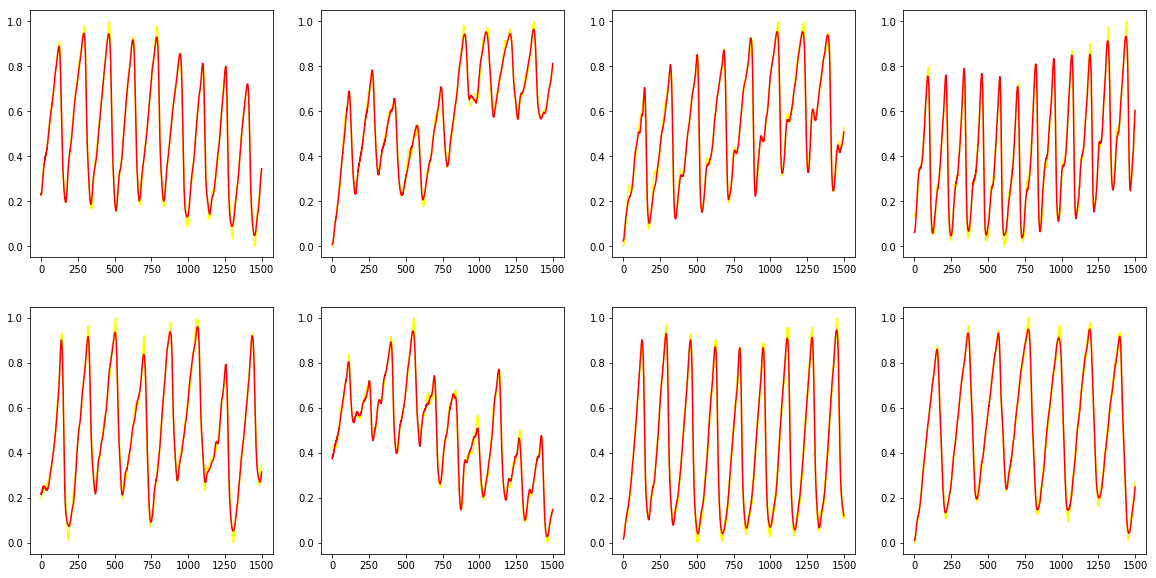

In [28]:
arrange = 240
plt.figure(figsize = (20,10))
plt.title('123')
c_id = 10
for p in range(1,9,1):
    arrange += 1
    c_plot = plt.subplot(arrange)
    c_input = Variable(training_set[c_id]).unsqueeze(0).cuda()
    c_encoded, c_decoded = model(c_input)
    c_decoded = c_decoded.cpu().data.numpy()
    c_plot.plot(training_set[c_id].data.numpy(), color = 'yellow')
    c_plot.plot(c_decoded[0], color = 'red')
    c_id += 1
plt.show()

## visualize test data

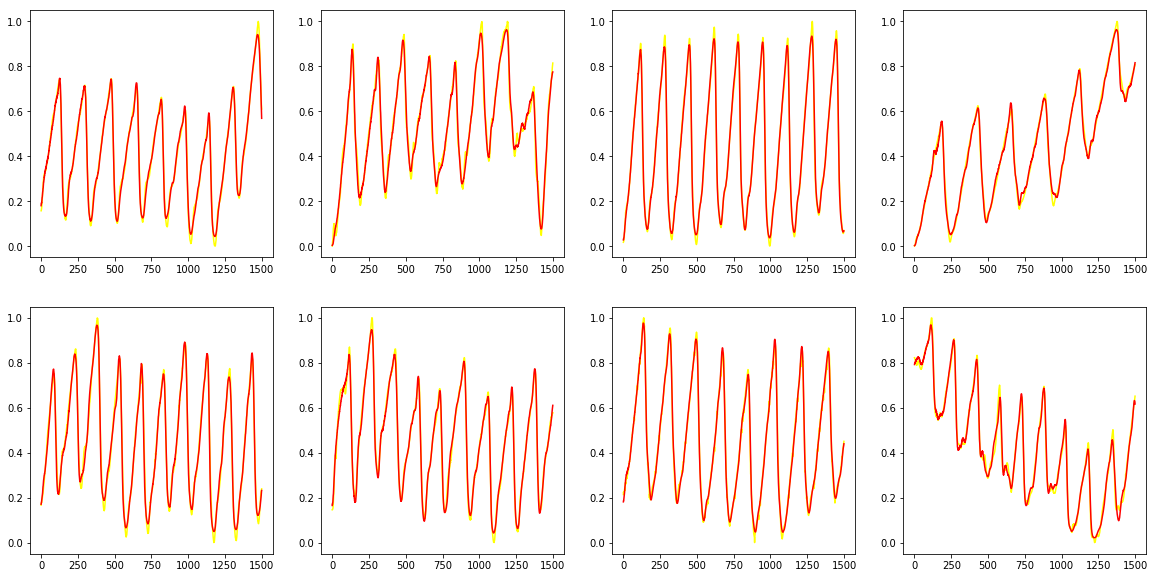

In [29]:
arrange = 240
plt.figure(figsize = (20,10))
plt.title('123')
c_id = 10
for p in range(1,9,1):
    arrange += 1
    c_plot = plt.subplot(arrange)
    c_input = Variable(test_set[c_id]).unsqueeze(0).cuda()
    c_encoded, c_decoded = model(c_input)
    c_decoded = c_decoded.cpu().data.numpy()
    c_plot.plot(test_set[c_id].data.numpy(), color = 'yellow')
    c_plot.plot(c_decoded[0], color = 'red')
    c_id += 1
plt.show()

In [31]:
#calculate all mse on training and test data
from sklearn.metrics import mean_squared_error

training_mse = 0
for c_id in range(len(training_set)):
    c_input = Variable(training_set[c_id]).unsqueeze(0).cuda()
    c_encoded, c_decoded = model(c_input)
    c_decoded = c_decoded.cpu().data.numpy()
    training_mse += mean_squared_error(training_set[c_id].data.numpy(), c_decoded[0])

training_mse = training_mse / len(training_set)



test_mse = 0
for c_id in range(len(test_set)):
    c_input = Variable(test_set[c_id]).unsqueeze(0).cuda()
    c_encoded, c_decoded = model(c_input)
    c_decoded = c_decoded.cpu().data.numpy()
    test_mse += mean_squared_error(test_set[c_id].data.numpy(), c_decoded[0])

test_mse = test_mse / len(test_set)

In [35]:
print('training loss:%.6f'%training_mse,'\t','testing loss:%.6f'%test_mse)

training loss:0.000452 	 testing loss:0.000572


## Elu
batch_size = 256

epoch = 10000

learning rate = 0.001

alpha = 0.8

network structure: 1500-200-100-50-100-200-1500

activation function: Elu

loss function: mse

optimizer: Adam

In [36]:
ALPHA = 0.8

In [37]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(nb_diff, 200),
            nn.ELU(alpha = ALPHA),
            nn.Linear(200, 100),
            nn.ELU(alpha = ALPHA),
            nn.Linear(100, 50),
        )
        self.decoder = nn.Sequential(
            nn.Linear(50, 100),
            nn.ELU(alpha = ALPHA),
            nn.Linear(100, 200),
            nn.ELU(alpha = ALPHA),
            nn.Linear(200, nb_diff),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [42]:
cd /home/jimmy/Desktop/autoencoder/07312018alpha_search

/home/jimmy/Desktop/autoencoder/07312018alpha_search


In [43]:
ls

autoencoder_elu_alpha_0.2        autoencoder_pytorch_elu_a0.8.py
autoencoder_elu_alpha_0.4        autoencoder_pytorch_elu.py
autoencoder_elu_alpha_0.6        detect_peaks.py
autoencoder_elu_alpha_0.8        good_data_starts_valley.csv
autoencoder_pytorch_elu_a0.2.py  peak_loss_pytorch.py
autoencoder_pytorch_elu_a0.4.py  __pycache__/
autoencoder_pytorch_elu_a0.6.py


In [44]:
model = AutoEncoder()
model.load_state_dict(torch.load('autoencoder_elu_alpha_0.8'))
model.cuda()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=1500, out_features=200, bias=True)
    (1): ELU(alpha=0.8)
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): ELU(alpha=0.8)
    (4): Linear(in_features=100, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=100, bias=True)
    (1): ELU(alpha=0.8)
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ELU(alpha=0.8)
    (4): Linear(in_features=200, out_features=1500, bias=True)
    (5): Sigmoid()
  )
)

## visualize training data

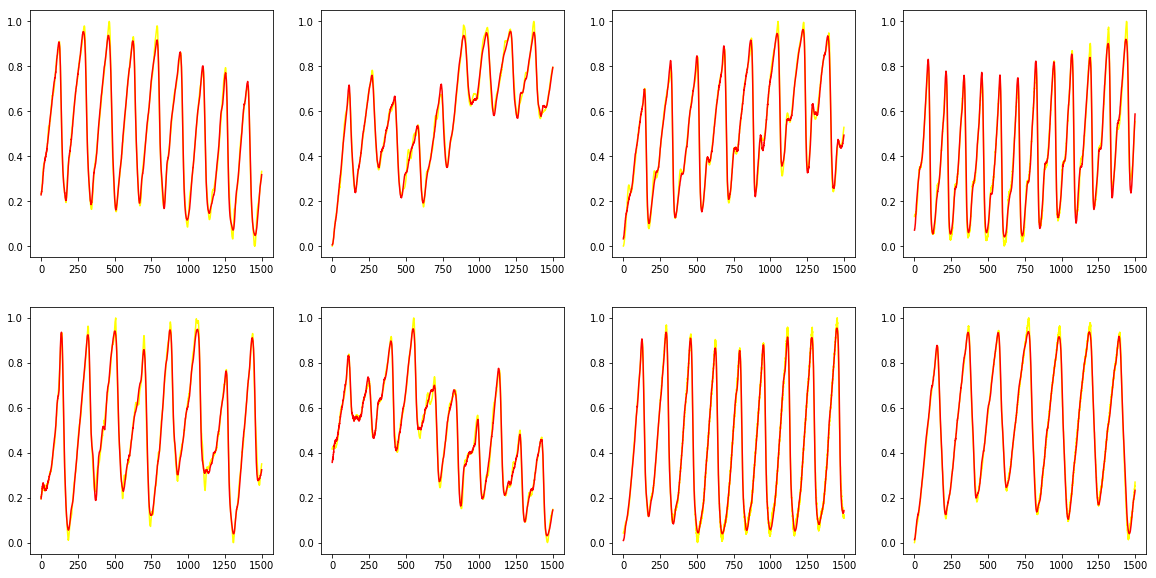

In [45]:
arrange = 240
plt.figure(figsize = (20,10))
plt.title('123')
c_id = 10
for p in range(1,9,1):
    arrange += 1
    c_plot = plt.subplot(arrange)
    c_input = Variable(training_set[c_id]).unsqueeze(0).cuda()
    c_encoded, c_decoded = model(c_input)
    c_decoded = c_decoded.cpu().data.numpy()
    c_plot.plot(training_set[c_id].data.numpy(), color = 'yellow')
    c_plot.plot(c_decoded[0], color = 'red')
    c_id += 1
plt.show()

## visualize test data

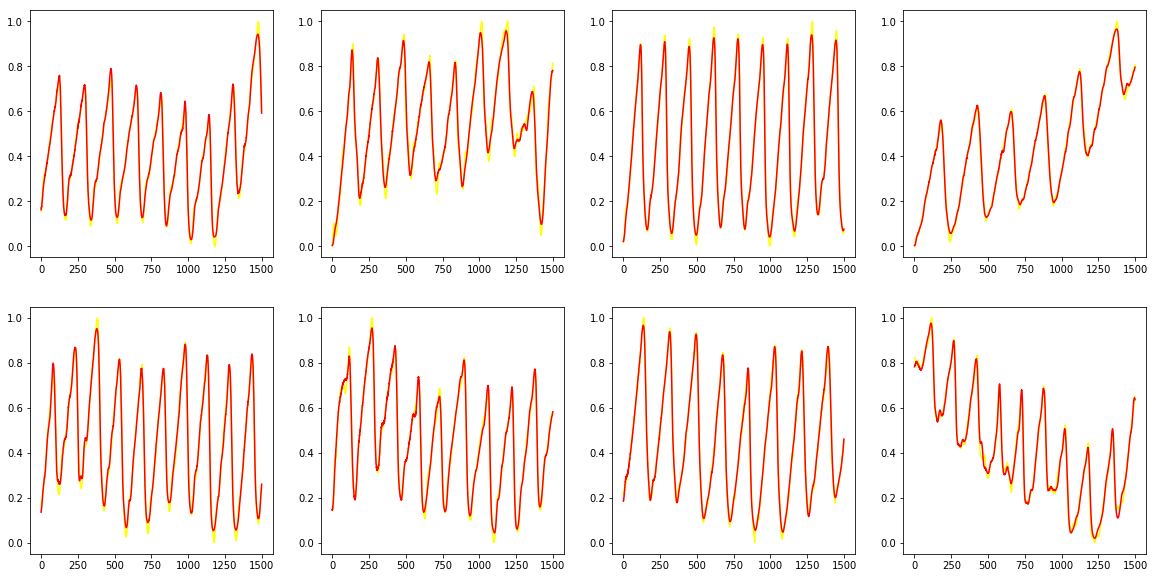

In [46]:
arrange = 240
plt.figure(figsize = (20,10))
plt.title('123')
c_id = 10
for p in range(1,9,1):
    arrange += 1
    c_plot = plt.subplot(arrange)
    c_input = Variable(test_set[c_id]).unsqueeze(0).cuda()
    c_encoded, c_decoded = model(c_input)
    c_decoded = c_decoded.cpu().data.numpy()
    c_plot.plot(test_set[c_id].data.numpy(), color = 'yellow')
    c_plot.plot(c_decoded[0], color = 'red')
    c_id += 1
plt.show()

In [47]:
training_mse = 0
for c_id in range(len(training_set)):
    c_input = Variable(training_set[c_id]).unsqueeze(0).cuda()
    c_encoded, c_decoded = model(c_input)
    c_decoded = c_decoded.cpu().data.numpy()
    training_mse += mean_squared_error(training_set[c_id].data.numpy(), c_decoded[0])

training_mse = training_mse / len(training_set)



test_mse = 0
for c_id in range(len(test_set)):
    c_input = Variable(test_set[c_id]).unsqueeze(0).cuda()
    c_encoded, c_decoded = model(c_input)
    c_decoded = c_decoded.cpu().data.numpy()
    test_mse += mean_squared_error(test_set[c_id].data.numpy(), c_decoded[0])

test_mse = test_mse / len(test_set)
print('training loss:%.6f'%training_mse,'\t','testing loss:%.6f'%test_mse)

training loss:0.000454 	 testing loss:0.000568


## Customize 
## Loss Function

## Add peak & valley loss to loss function

class MyLoss(nn.Module):

    def __init__(self):
    
        super(MyLoss, self).__init__()
        
    def forward(self, yp, yt):
    
        yt_cpu = yt.cpu().data.numpy()
        
        total_loss = 0
        
        for i in range(len(yt_cpu)):
        
            cur_y =yt_cpu[i]
            
            peak = detect_peaks.detect_peaks(cur_y, mpd=150, show = False)
            
            valley = detect_peaks.detect_peaks(cur_y, valley = True, mpd=150, show = False)
            
            total_loss += ((yt[i][peak] - yp[i][peak]) **2).sum() + ((yt[i][valley] - yp[i][valley]) **2).sum()
            
        total_loss = total_loss / len(yt_cpu)
        
        return total_loss
        
loss_func2 = nn.MSELoss()

loss_func = MyLoss()

lossweight = 0.5

for epoch in range(EPOCH):

    for ...:
    
        ...
        
        loss = lossweight * loss_func(decoded, b_y_cuda) + (1 - lossweight) * loss_func2(decoded, b_y_cuda)
        
        ...
        

## Keras

In [49]:
cd /home/jimmy/Desktop/autoencoder/07272018activation_function

/home/jimmy/Desktop/autoencoder/07272018activation_function


## Load elu model
batch_size = 256

epoch = 10000

learning rate = 0.001

alpha = 1.0(defualt)

network structure: 1500-200-100-50-100-200-1500

activation function: Elu

loss function: mse

optimizer: Adam

In [50]:
from keras.models import load_model
from keras.models import Model
from keras.layers import Dense, Input
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import peak_loss

model_elu = load_model('auto_keras_elu.h5')

from sklearn.model_selection import train_test_split
random_state = 11
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = random_state)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
training_set = sc.fit_transform(training_set.T).T

sc2 = MinMaxScaler((0,1))
test_set = sc2.fit_transform(test_set.T).T

Using TensorFlow backend.


## visualizer training data

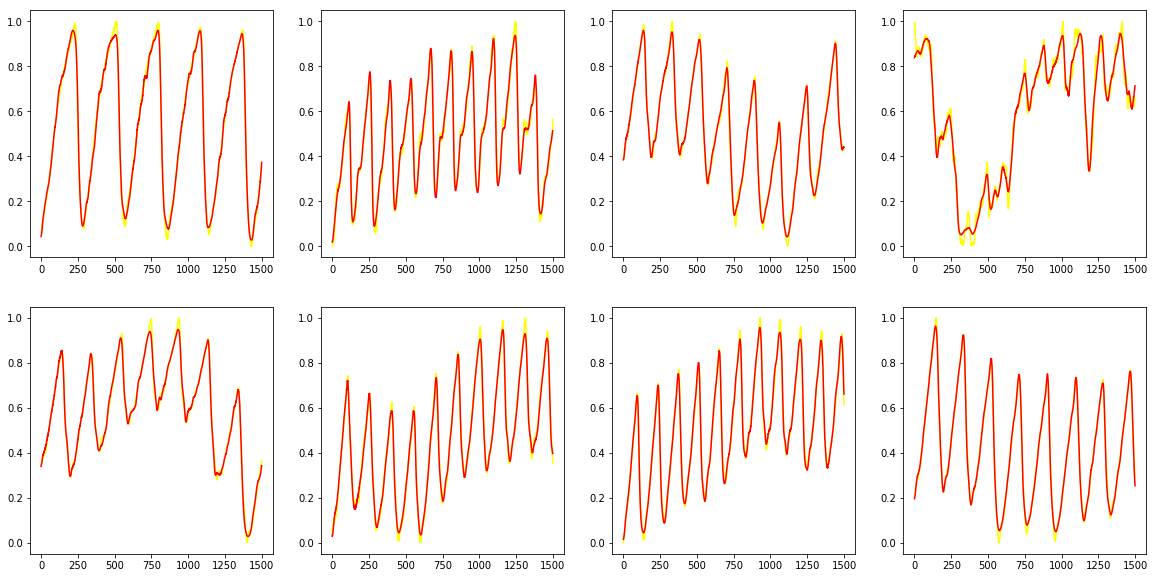

In [53]:
arrange = 240
plt.figure(figsize = (20,10))
plt.title('123')
c_id = 0
for p in range(1,9,1):
    arrange += 1
    c_plot = plt.subplot(arrange)
    c_input = training_set[c_id].reshape(1,-1)
    c_encoded = model_elu.predict(c_input)
    c_plot.plot(c_input[0], color = 'yellow')
    c_plot.plot(c_encoded[0], color = 'red')
    c_id += 1
plt.show()

## visualize test data

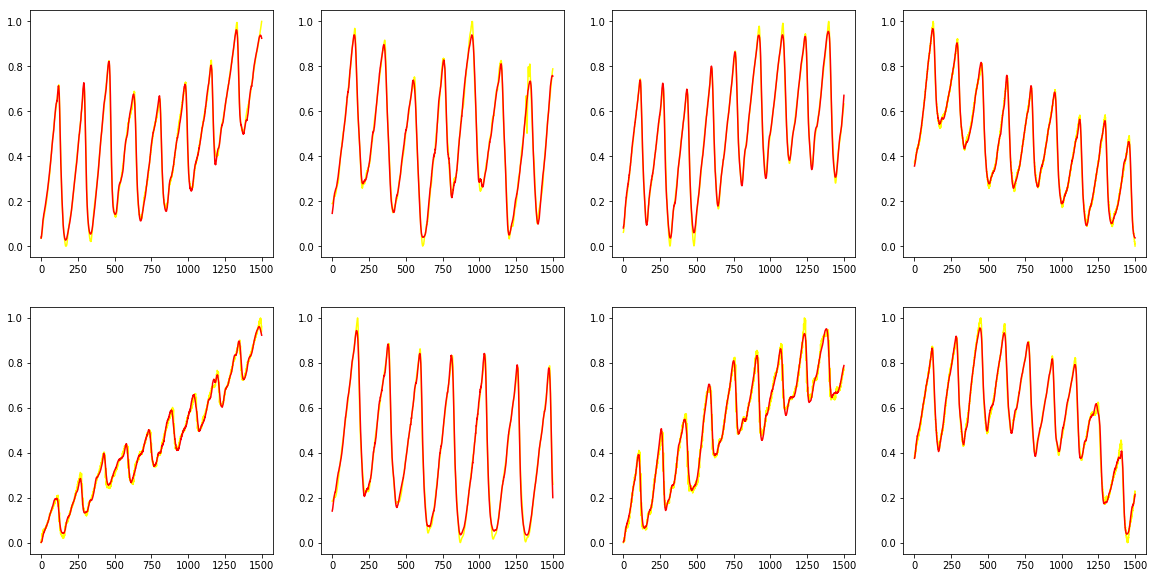

In [56]:
arrange = 240
plt.figure(figsize = (20,10))
plt.title('123')
c_id = 0
for p in range(1,9,1):
    arrange += 1
    c_plot = plt.subplot(arrange)
    c_input = test_set[c_id].reshape(1,-1)
    c_encoded = model_elu.predict(c_input)
    c_plot.plot(c_input[0], color = 'yellow')
    c_plot.plot(c_encoded[0], color = 'red')
    c_id += 1
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error
predicted_train = model_elu.predict(training_set)
training_mse = mean_squared_error(training_set, predicted_train)
predicted_test = model_elu.predict(test_set)
test_mse = mean_squared_error(test_set, predicted_test)

In [60]:
print('training loss:%.6f'%training_mse,'\t','testing loss:%.6f'%test_mse)

training loss:0.000449 	 testing loss:0.000569
